In [21]:
import torch
import torchvision
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt

In [22]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu"
print("Device:", device)

model = torchvision.models.resnet50(weights='IMAGENET1K_V1')
model.fc = torch.nn.Linear(model.fc.in_features, 10)
state_dict = torch.load('models/resnet_stl10.pth')
model.load_state_dict(state_dict)
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()

Device: mps


In [23]:
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(imagenet_mean, imagenet_std)
])

robust_dataset = datasets.ImageFolder(root='data/stl10_robustness_set', transform=transform)

robust_loader = DataLoader(
    robust_dataset,
    batch_size=3,
    shuffle=False,
    num_workers=2
)

stl10_classes = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6555357..1.1155462].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


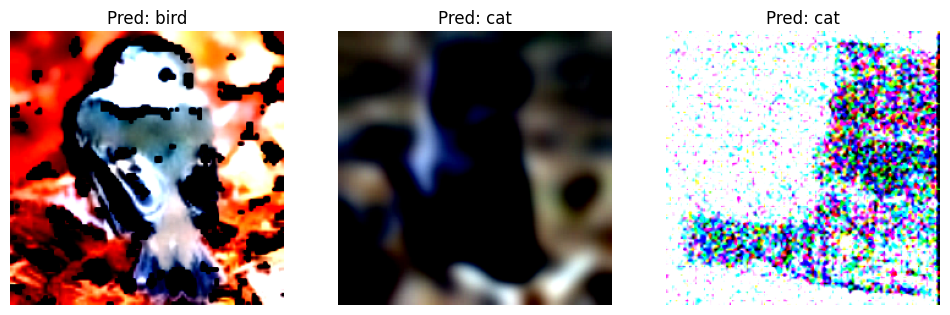

In [24]:
model.to(device)
model.eval()

images, labels = next(iter(robust_loader))
images = images.to(device)

with torch.no_grad():
    preds = model(images)
    preds = torch.argmax(preds, dim=1).cpu().numpy()

plt.figure(figsize=(12, 4))
for i in range(len(preds)):
    plt.subplot(1, len(preds), i+1)
    img = images[i].cpu().permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pred: {stl10_classes[preds[i]]}")
plt.show()